### Aggrigated Co2 emission (kg) by Continents

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_parquet("https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/cleaned_aviation_data_v3.parquet")

In [38]:
df= df[['departure_continent', 'arrival_continent', 'co2_per_distance', 'domestic']]
df.sample(10)

,departure_continent,arrival_continent,co2_per_distance,domestic
101670,EU,EU,130.133974,0
112831,NA,NA,41.908369,1
96466,EU,EU,78.804983,1
13667,EU,EU,4179.994616,0
257841,AS,AS,4947.255015,1
285622,SA,SA,7.506216,1
56609,NA,NA,644.417555,1
130770,EU,EU,41.771283,0
160367,EU,EU,18.498675,0
59810,EU,EU,751.118112,0


In [41]:

emissions_by_departure = df.groupby('departure_continent')['co2_per_distance'].sum().reset_index()
emissions_by_arrival = df.groupby('arrival_continent')['co2_per_distance'].sum().reset_index()

print(emissions_by_departure)
print(emissions_by_arrival)


  departure_continent  co2_per_distance
0                  AF      1.503637e+07
1                  AS      2.074052e+08
2                  EU      1.153271e+08
3                  NA      1.351073e+08
4                  OC      1.437581e+07
5                  SA      2.766717e+07
  arrival_continent  co2_per_distance
0                AF      1.503637e+07
1                AS      2.074052e+08
2                EU      1.153271e+08
3                NA      1.351073e+08
4                OC      1.437581e+07
5                SA      2.766717e+07


In [45]:
# 1. Filter only domestic flights
df_domestic = df[df['domestic'] == 0]

# 2. Group by departure continent (for domestic flights)
emissions_by_departure_domestic = df_domestic.groupby('departure_continent')['co2_per_distance'].sum().reset_index()

# 3. Group by arrival continent (for domestic flights)
emissions_by_arrival_domestic = df_domestic.groupby('arrival_continent')['co2_per_distance'].sum().reset_index()

# 4. Print results
print("International - CO₂ Emissions by Departure Continent:")
print(emissions_by_departure_domestic)

print("International - CO₂ Emissions by Arrival Continent:")
print(emissions_by_arrival_domestic)


International - CO₂ Emissions by Departure Continent:
  departure_continent  co2_per_distance
0                  AF      8.961924e+06
1                  AS      7.290917e+07
2                  EU      7.916991e+07
3                  NA      2.506492e+07
4                  OC      3.278360e+06
5                  SA      4.470839e+06
International - CO₂ Emissions by Arrival Continent:
  arrival_continent  co2_per_distance
0                AF      8.961924e+06
1                AS      7.290917e+07
2                EU      7.916991e+07
3                NA      2.506492e+07
4                OC      3.278360e+06
5                SA      4.470839e+06


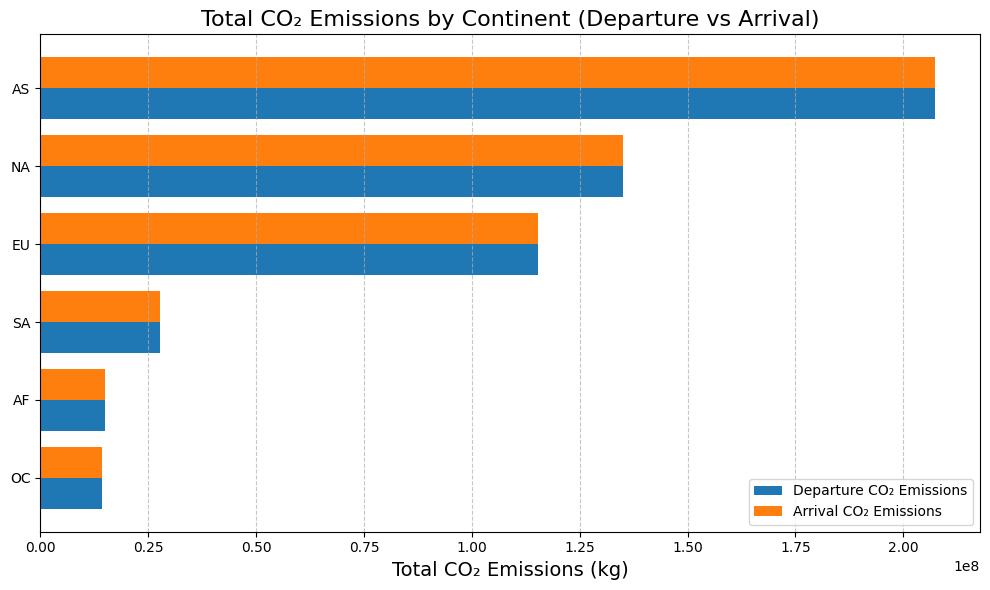

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Prepare emissions
emissions_by_departure = df.groupby('departure_continent')['co2_per_distance'].sum().reset_index()
emissions_by_arrival = df.groupby('arrival_continent')['co2_per_distance'].sum().reset_index()

# 2. Merge them into one DataFrame
emissions_combined = pd.merge(
    emissions_by_departure, 
    emissions_by_arrival, 
    left_on='departure_continent', 
    right_on='arrival_continent', 
    how='outer', 
    suffixes=('_departure', '_arrival')
)

# 3. Fill missing values with 0 (if any)
emissions_combined = emissions_combined.fillna(0)

# 4. Use one common 'continent' column
emissions_combined['continent'] = emissions_combined['departure_continent'].combine_first(emissions_combined['arrival_continent'])

# 5. Sort for nicer visualization
emissions_combined = emissions_combined.sort_values('co2_per_distance_departure', ascending=True)

# 6. Plot
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(emissions_combined))

# Departure bars
plt.barh(
    [i - bar_width/2 for i in index], 
    emissions_combined['co2_per_distance_departure'], 
    height=bar_width, 
    label='Departure CO₂ Emissions'
)

# Arrival bars
plt.barh(
    [i + bar_width/2 for i in index], 
    emissions_combined['co2_per_distance_arrival'], 
    height=bar_width, 
    label='Arrival CO₂ Emissions'
)

plt.yticks(index, emissions_combined['continent'])
plt.xlabel('Total CO₂ Emissions (kg)', fontsize=14)
plt.title('Total CO₂ Emissions by Continent (Departure vs Arrival)', fontsize=16)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
